# ABALONE DATASET


This dataset was obtained from UCI Machine Learning Repository. A full description of this dataset can be obtained from the website. The objective of this dataset is to predict the age of abalone based on the given eight attributes-sex, length, diameter, height, whole weight, shucked weight, viscera weight, and shell weight. The age is determined by the number of rings. Getting this dataset is expensive since cutting each abalone to measure the ring is an exhaustive and expensive approach. The machine learning process aims to overcome this difficulty by predicting the age of abalone from the aforementioned eight attributes.

The process will mostly involve regression methods. However, classification methods are not rule out as well. This whole document will demonstrate the application of several thorough ML processes, including training and testing, cross-validation, and model evaluation.

This project does not serve to complement or compete the existing research on this dataset. Rather, it is a demonstration of my personal skills and aptitude on using Scikit-Learn, Pandas, Numpy, and Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing the data

In [2]:
data=pd.read_csv('Abalone.csv')

# Displaying the data

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Checking the shape

In [4]:
data.shape

(4177, 9)

# Checking the Datatypes for the features

In [5]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

# Exploring the Data

In [6]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Count for the class variable

In [8]:
data.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

# Categorical  feature value count

In [9]:
data.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

# Null Values Analysis

In [10]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [11]:
#sorting the data on Height
data.sort_values(by=["Height"]).head(15)
data.shape

(4177, 9)

In [12]:
data = data.loc[data["Height"] != 0.0]
data.head()
data.shape


(4175, 9)

# Encoding the categorical feature using LabelEncoder

In [13]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
list1=['Sex']
for val in list1:
    data[val]=Le.fit_transform(data[val].astype(str))
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Checking for the skewness

In [14]:
data.skew()

Sex              -0.098224
Length           -0.640993
Diameter         -0.610182
Height            3.166364
Whole weight      0.530549
Shucked weight    0.718735
Viscera weight    0.591455
Shell weight      0.621081
Rings             1.113754
dtype: float64

# Univariate Analysis

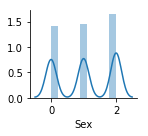

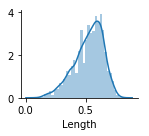

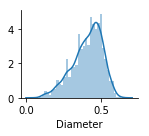

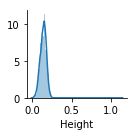

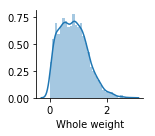

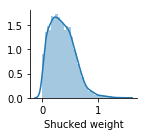

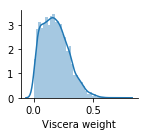

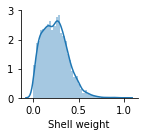

In [15]:
import warnings
warnings.filterwarnings("ignore")
columns=list(data.columns[:-1])
for val in columns:
#Plotting Probablity Density Function Curve for the columns : -
    sns.FacetGrid(data,size=2)\
    .map(sns.distplot,val)\
    .add_legend()
    plt.show()

# BIVARIATE ANALYSIS

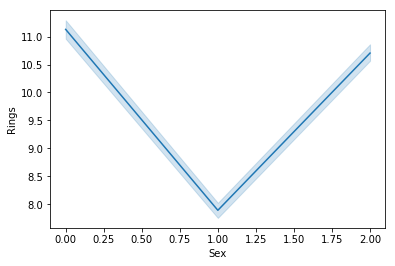

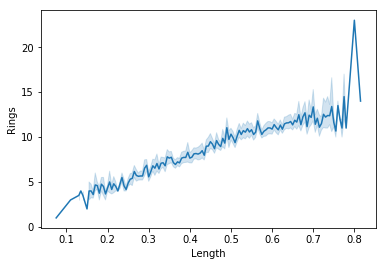

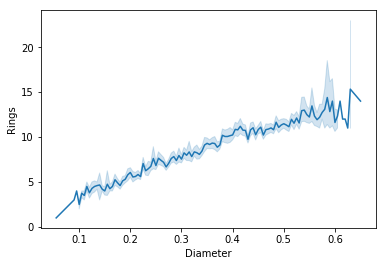

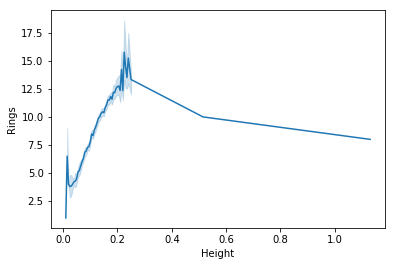

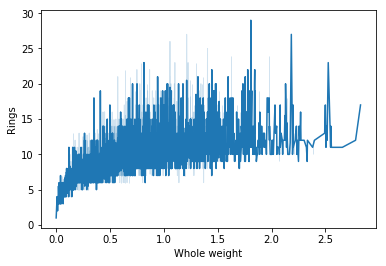

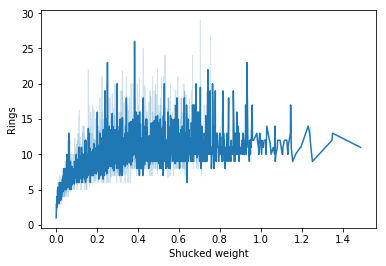

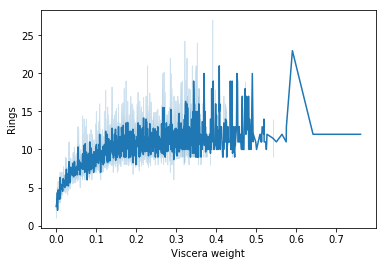

In [17]:
column=list(data.columns[:-2])
for val in column:
    sns.lineplot(x=val,y='Rings', data=data)
    plt.show()

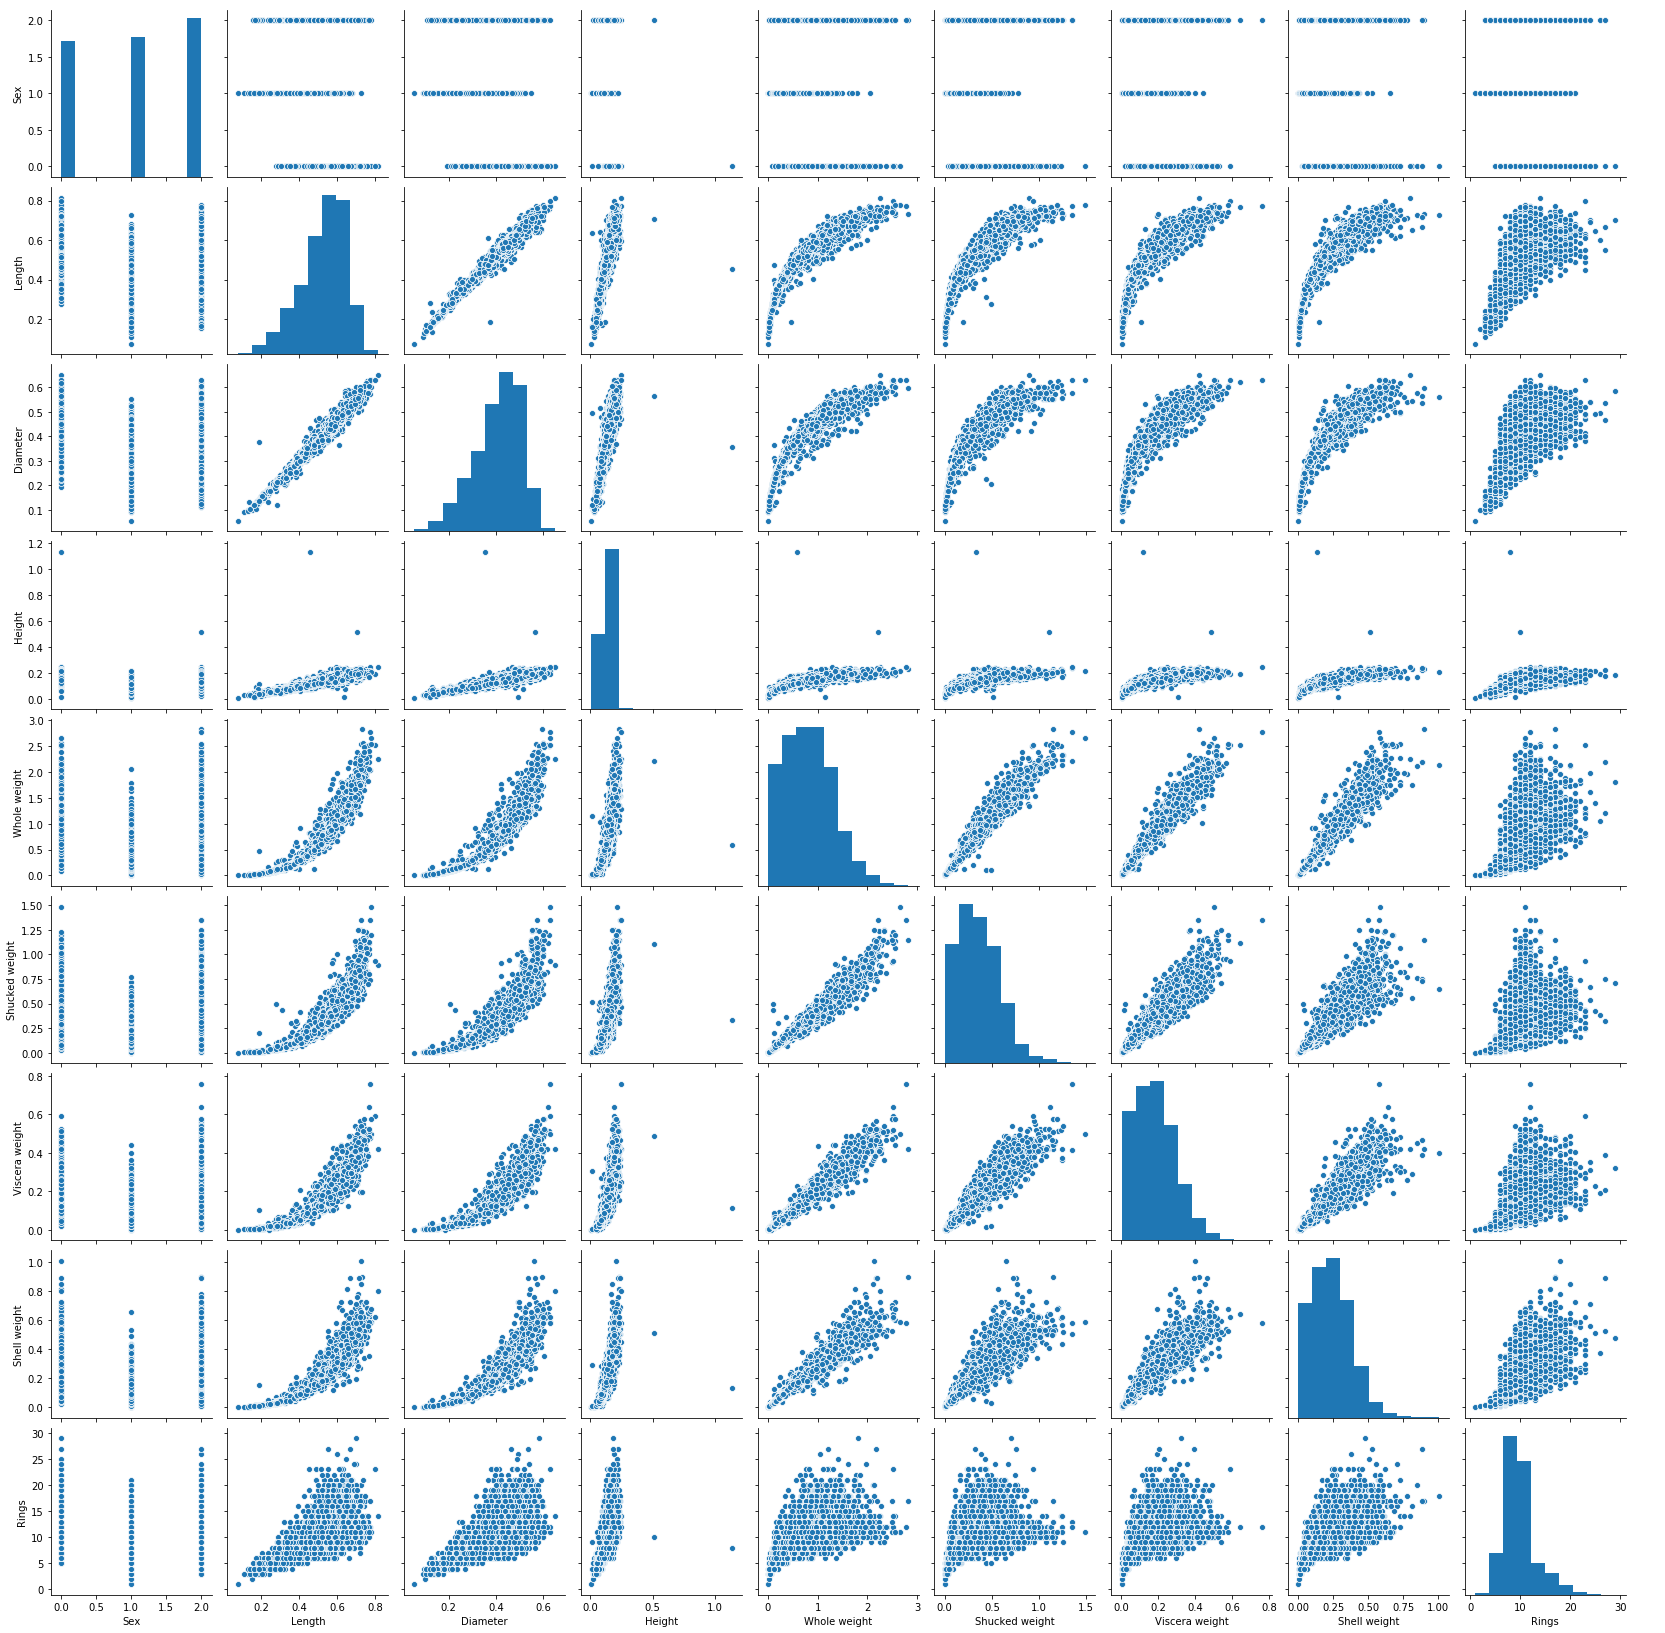

In [186]:
sns.pairplot(data)

# Correlation matrix

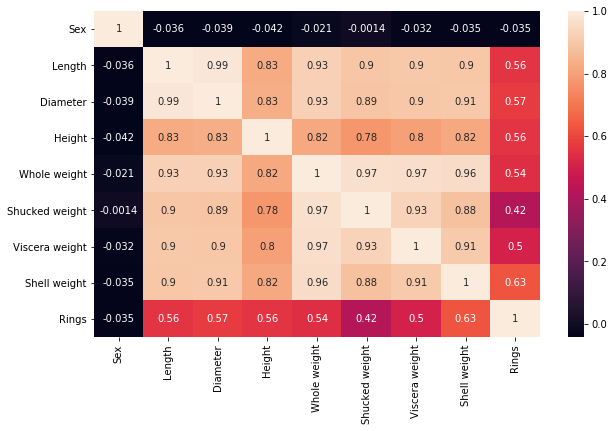

In [18]:
df_cor=data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(df_cor,annot=True )

# Checking for the Outliers

Sex                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
Length            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Diameter          AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Height               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Whole weight      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Shucked weight    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Viscera weight          AxesSubplot(0.125,0.125;0.227941x0.222059)
Shell weight         AxesSubplot(0.398529,0.125;0.227941x0.222059)
Rings                AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

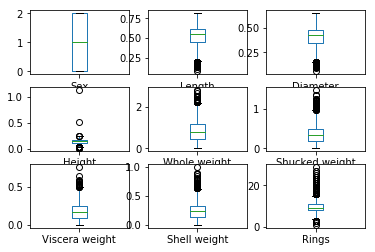

In [188]:
data.plot(kind='box',subplots=True , layout=(3,3))

# Outliers Removal Using Zscore

In [22]:
from  scipy.stats import zscore
zs=np.abs(zscore(data))


In [23]:
df=data[(zs<3).all(axis=1)]
print('shape of the data with outliers  ' ,data.shape)
print('shape of the data without  outliers  ' ,df.shape)

shape of the data with outliers   (4175, 9)
shape of the data without  outliers   (4027, 9)


In [24]:
y=df['Rings']
x=df.iloc[:,:-1]

Using Log transformation to remove the skewness greater than 0.55

In [29]:
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])
x.skew()

0   -0.094886
1   -0.623076
2   -0.598650
3   -0.244251
4    0.334204
5    0.458295
6    0.437116
7    0.349471
dtype: float64

# Standardising the dataset

In [30]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x))
x

,0,1,2,3,4,5,6,7
0,1.159698,-0.569368,-0.420274,-1.166207,-0.633156,-0.603733,-0.723057,-0.630659
1,1.159698,-1.475358,-1.463127,-1.301806,-1.265644,-1.209410,-1.231104,-1.256033
2,-1.285382,0.077768,0.153294,-0.081420,-0.275805,-0.448680,-0.331135,-0.161629
3,1.159698,-0.698795,-0.420274,-0.352617,-0.628771,-0.647342,-0.597255,-0.591574
4,-0.062842,-1.647928,-1.567412,-1.573003,-1.310587,-1.257865,-1.318198,-1.373290
...,...,...,...,...,...,...,...,...
4022,-1.285382,0.379764,0.466150,0.732171,0.184584,0.101275,0.612382,0.143240
4023,1.159698,0.595476,0.361865,-0.081420,0.357779,0.435609,0.375293,0.233138
4024,1.159698,0.681761,0.726863,1.816959,0.818169,0.854737,1.081721,0.604453
4025,-1.285382,0.897473,0.831148,0.325376,0.639493,0.881387,0.825278,0.510647


# UNIVARIATE analysis after removing skewness

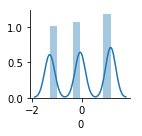

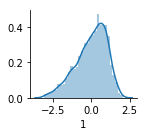

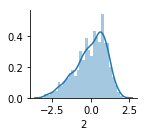

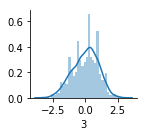

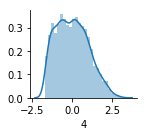

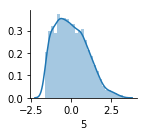

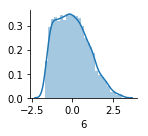

In [32]:
import warnings
warnings.filterwarnings("ignore")
columns=list(x.columns[:-1])
for val in columns:
#Plotting Probablity Density Function Curve for the columns : -
    sns.FacetGrid(x,size=2)\
    .map(sns.distplot,val)\
    .add_legend()
    plt.show()

# Analysing various Regression algorithm for the best modelling

Building a function to find the maximum r2-score corresponding to the random state

In [34]:
from  sklearn.metrics import r2_score
def max_r2_score(model,x,y):
    random_state=np.arange(42,101)
    max_r2_score=0
    for r_state in random_state:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        r2_scr=r2_score(test_y,pred)
        #print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
        if r2_scr > max_r2_score:
            max_r2_score=r2_scr
            Final_r_state=r_state
    print('The maximum r2 score  is {} at random state {}' .format(max_r2_score,Final_r_state))

# Performing Linear Regression

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
max_r2_score(lreg,x,y)

The maximum r2 score  is 0.5524697076756382 at random state 82


In [36]:
from sklearn.model_selection import cross_val_score
print('mean cross_val_score',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())

mean cross_val_score 0.41480204014861305
std deviation of cross_val_score 0.1076818121147202


# Performing KNeighborsRegressor

In [37]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gs=GridSearchCV(knr,neighbors,cv=10)
gs.fit(x,y)
gs.best_params_

{'n_neighbors': 25}

In [38]:
knr=KNeighborsRegressor(n_neighbors=25)
max_r2_score(lreg,x,y)


The maximum r2 score  is 0.5524697076756382 at random state 82


In [39]:
print('mean of cross_val_score',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(knr,x,y,cv=5,scoring='r2').std())

mean of cross_val_score 0.4406597192888153
std deviation of cross_val_score 0.08648039045608011


# Performing Lasso regression

In [40]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameter={"alpha":[0.001,0.01,0.1,1]}
gs=GridSearchCV(lsreg,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'alpha': 0.01}

In [41]:
lsreg=Lasso(alpha=0.01)
max_r2_score(lreg,x,y)
print('mean of cross_val_score',cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())


The maximum r2 score  is 0.5524697076756382 at random state 82
mean of cross_val_score 0.41320676287237035
std deviation of cross_val_score 0.1082371570575473


# Performing DecisionTreeRegressor

In [42]:
from sklearn.tree import DecisionTreeRegressor
depth={'max_depth':range(1,30)}
dt=DecisionTreeRegressor()
gs=GridSearchCV(dt,depth,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 6}

In [47]:
DT=DecisionTreeRegressor(max_depth=6)
max_r2_score(DT,x,y)
print('mean of cross_val_score',cross_val_score(DT,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(DT,x,y,cv=5,scoring='r2').std())

The maximum r2 score  is 0.5180805770565313 at random state 58
mean of cross_val_score 0.3828176433855903
std deviation of cross_val_score 0.07173620862022227


# Performing GradientBoostingRegressor

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
gbr=GradientBoostingRegressor()
gs=GridSearchCV(gbr,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [45]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
max_r2_score(lreg,x,y)
print('mean of cross_val_score',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

The maximum r2 score  is 0.5524697076756382 at random state 82
mean of cross_val_score 0.46994758537693604
std deviation of cross_val_score 0.07873679044701569


# Performing AdaBoostRegressor

In [49]:
from sklearn.ensemble import AdaBoostRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DT]}
ad=AdaBoostRegressor()
gs=GridSearchCV(ad,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 0.001,
 'n_estimators': 100}

After applying the  AdaBoostRegressor using grid seach we can find the 'base_estimator': DecisionTreeRegressor , 'learning_rate': 0.001,
 'n_estimators': 100 as the best parameters, using this parameter to find the accuracy of AdaBoostRegressor 

In [50]:
ad=AdaBoostRegressor(learning_rate=0.001,n_estimators=100,base_estimator=DT)
max_r2_score(ad,x,y)
print('mean of cross_val_score',cross_val_score(ad,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(ad,x,y,cv=5,scoring='r2').std())

The maximum r2 score  is 0.5700522726132994 at random state 45
mean of cross_val_score 0.4559723097018146
std deviation of cross_val_score 0.07422259098844046


# Final Model

From comparing the R2 score given by the models performed above , it is found that the AdaBoostRegressor is showing better results
and is therefore selected as Final model.

In [51]:
x=np.array(x)
y=np.array(y)
ad=AdaBoostRegressor(learning_rate=0.001,n_estimators=100,base_estimator=DT)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=45)
ad.fit(train_x,train_y)
pred = ad.predict(test_x)
r2_scr=r2_score(test_y,pred)

In [52]:
from sklearn.metrics import mean_squared_error
print('RMSE',np.sqrt(mean_squared_error(test_y,pred)))
print('r2_score',r2_score(test_y,pred))

RMSE 1.9262962119470743
r2_score 0.5731952340563616


# Analysing the plot between actual y and predicted y

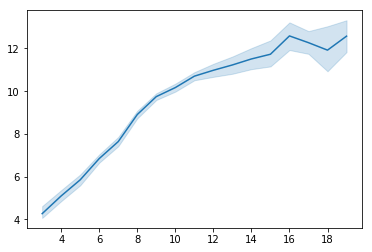

In [56]:
sns.lineplot(test_y, pred)

# Saving the final Model

In [ ]:
from sklearn.externals import joblib
joblib.dump(ada,"ada_abalone.pkl")